# Part.4 WORD EMBEDDING

Word Embedding adalah representasi vektor dari kata-kata dalam bentuk numerik, yang digunakan dalam pemrosesan bahasa alami (NLP) untuk menangkap makna semantik dari kata-kata. Tujuan utama dari word embedding adalah untuk memetakan kata-kata dengan arti yang serupa ke ruang vektor yang dekat satu sama lain.






# Skip-Gram
Skip Gram merupakan model yang menggunakan pendekatan berbasis jaringan saraf untuk menghasilkan representasi vektor dari kata-kata dengan memprediksi kata-kata yang muncul di sekitarnya. Dengan kata lain, model belajar untuk mengambil sebuah kata pusat (center word) dan memperkirakan kata-kata yang kemungkinan muncul di sekitarnya dalam kalimat atau teks.Tujuan akhir dari model Skip-Gram adalah untuk mendapatkan representasi vektor yang baik dari kata-kata.

### Arsitektur Skip-Gram
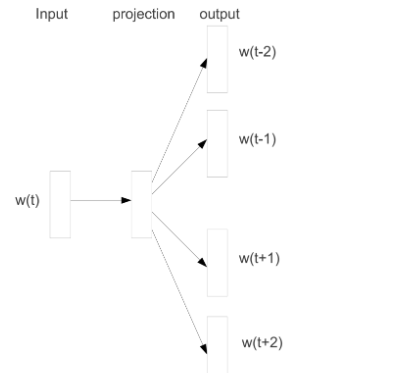



Arsitektur model Skip-gram  diatas menggunakan jaringan saraf dengan satu lapisan tersembunyi (*Hidden Layer*) untuk melakukan prediksi. Model Skip-Gram berfokus pada memprediksi kata-kata konteks yang berdekatan (dalam hal ini, w(t−2), w(t−1), w(t+1), w(t+2)) berdasarkan kata pusat (w(t)). Ini berarti bahwa untuk setiap kata pusat yang diberikan, model berusaha memprediksi kata-kata yang mungkin muncul di sekitarnya.


### Derivation of Cost Function (Penurunan Fungsi Biaya)

Model Skip-Gram bertujuan mengoptimalkan matriks bobot kata (embedding) dengan memprediksi kata-kata konteks berdasarkan kata pusat. Dengan memaksimalkan probabilitas prediksi semua kata konteks secara bersamaan, model ini mengoptimalkan matriks bobot ( $\theta$ ) yang merepresentasikan kata-kata dalam ruang vektor. Matriks $\theta$ merupakan gabungan matriks bobot input dan output, dinyatakan sebagai\($[W_{input}, W_{output}]$), dan berfungsi sebagai variabel yang dioptimalkan dalam fungsi biaya ($J$).Secara matematis,dinyatakan sebagai berikut:
$$
\underset{\theta}{\text{argmax}} \,\, p(w_{1}, w_{2}, ... , w_{C}|w_{center}; \, \theta) \tag{1}
$$

di mana \(C\) adalah ukuran jendela konteks, dan \(w\) adalah vektor kata (yang bisa berupa kata konteks atau kata pusat).Dalam statistik, probabilitas \(A\) diberikan \(B\) dinyatakan sebagai \(P(A|B)\),maka mengambil logaritma natural dari persamaan (1) untuk menyederhanakan proses pengambilan turunan. menghasilkan
$$
\underset{\theta}{\text{argmax}} \,\, log \, p(w_{1}, w_{2}, ... , w_{C}|w_{center}; \, \theta) \tag{2}
$$

***Penggunaan Fungsi Sofmax***

Dalam model Skip-Gram, fungsi softmax digunakan untuk klasifikasi kata konteks. Fungsi softmax dalam model Skip-Gram dinyatakan sebagai:
$$
p(w_{context}|w_{center}; \, \theta) = \frac{exp(W_{output_{(context)}} \cdot h)}{\sum^V_{i=1}exp(W_{output_{(i)}} \cdot h)} \tag{3}
$$

Di mana ($W_{output}(context)$) adalah vektor baris untuk kata konteks dari matriks embedding output, dan ($h$) adalah vektor kata dari lapisan tersembunyi (proyeksi) untuk kata pusat. Fungsi softmax kemudian dimasukkan ke dalam persamaan (3) untuk menghasilkan fungsi objektif baru yang memaksimalkan probabilitas untuk mengamati semua \($C$) kata konteks, mengingat kata pusat:

$$
\underset{\theta}{\text{argmax}} \,\, log \, \prod_{c=1}^{C} \frac{exp(W_
{output_{(c)}} \cdot h)}{\sum^V_{i=1}exp(W_{output_{(i)}} \cdot h)} \tag{4}
$$

Meminimalkan fungsi biaya, dengan menambahkan tanda negatif:
$$
J(\theta; w^{(t)}) = -log \, \prod_{c=1}^{C} \frac{exp(W_{output_{(c)}} \cdot h)}{\sum^V_{i=1}exp(W_{output_{(i)}} \cdot h)} \tag{5}
$$

Dengan menerapkan sifat logaritma, fungsi biaya didapatkan menjadi:
$$
J(\theta; w^{(t)}) = -
\sum_{c=1}^{C}
log
\frac{exp(W_{output_{(c)}} \cdot h)}{\sum^V_{i=1}exp(W_{output_{(i)}} \cdot h)} \tag{6}
$$

Dengan menyederhanakan:
$$
J(\theta; w^{(t)}) = - \sum_{c=1}^{C}(W_{output_{(c)}} \cdot h) + C \cdot log \sum^V_{i=1}exp(W_{output_{(i)}} \cdot h) \tag{7}
$$

### Window Size of Skip-Gram (Ukuran Jendela)

Model Skip-Gram menggunakan softmax regression untuk memprediksi kata-kata tetangga dari kata pusat. Dalam hal ini, ukuran jendela ($C$) menggantikan jumlah label ($K$) dan biasanya berkisar antara 1 hingga 10.
Rumus Softmax regression untuk Skip-Gram dapat dituliskan sebagai berikut:
$$
J(\theta) =
-\frac{1}{T}
\sum^T_{t=1}
\sum_{-c\leq j \leq c,j\neq 0}
log
\frac
{exp(\theta^{(t+j)\top}x^{(t)})}
{\sum^K_{i=1}
exp(\theta^{(i)\top}x^{(t)})}
$$


### Training the Skip-Gram Model
Proses pelatihan model Skip-Gram dibagi menjadi langkah propagasi maju (forward propagation) dan propagasi mundur (backward propagation).

**Forward Propagation**
1. Input Layer (x) / Lapisan Input
Pada layer input, digunakan representasi one-hot encoding yang memiliki dimensi V (jumlah kata unik dalam korpus). Vektor input ini hanya memiliki satu nilai 1 yang mewakili kata pusat, sedangkan elemen lainnya adalah 0. Vektor ini kemudian dikalikan dengan matriks bobot input ($W_{input}$) yang berukuran V × N, di mana N adalah dimensi dari vektor embedding. Hasilnya adalah vektor berdimensi N yang menjadi layer tersembunyi (projection layer).


2. Lapisan Tersembunyi /Hidden (Projection) Layer
Hasil perkalian vektor input one-hot dan matriks bobot input menghasilkan lapisan tersembunyi, yaitu sebuah vektor berdimensi N.Persamaan untuk menghitung layer ini adalah:
$$
h = W_{input}^T \cdot x  \in \mathbb{R}^{N}
$$


4. Lapisan Output Layer
Hasil dari hidden layer dikalikan dengan matriks bobot output ($W_{output}$) untuk menghasilkan distribusi probabilitas kata-kata konteks menggunakan softmax.
$$
P = \frac{exp(W_{output} \cdot h)}{\sum^V_{i=1}exp(W_{output_{(i)}} \cdot h)} \in \mathbb{R}^{V}
$$

Dimana ($W_{output}$)($i$) adalah vektor dari matriks output untuk setiap kelas

**Backward Propagation**

1. Hitung Kesalahan Prediksi (Prediction Error)
Hitung kesalahan prediksi untuk setiap kata konteks. Kesalahan ini adalah selisih antara probabilitas yang diprediksi ($𝑦_{pred}$) dan probabilitas yang sebenarnya ($𝑦_{true}$). persamaan dapat ditulis sebagai berikut:
$$
e_c = y_{\text{pred}} - y_{\text{true}}
$$
2. Hitung Gradien untuk Matriks Bobot Input
Hitung gradien dari matriks bobot output ($W_{output}$ menggunakan rumus:
$$
\frac{\partial J}{\partial W_{\text{output}}} = h \cdot \sum_{c=1}^{C} e_c
$$
h adalah layer tersembunyi yang dihitung sebelumnya.

3.Perbarui matriks bobot input dan output

GD digunakan untuk memperbarui matriks bobot input ($W_{input}$) dan ($W_{output}$. Setelah menghitung gradien dari cost function terhadap bobot, SGD mengaplikasikan gradien tersebut untuk memperbarui bobot.Rumus pembaruan bobot yang menggunakan SGD adalah:
$$
W_{input}^{(new)}=W_{input}^{(old)}- \eta \cdot \frac{\partial J}{\partial W_{input}}
$$

$$
W_{output}^{(new)}=W_{output}^{(old)}- \eta \cdot \frac{\partial J}{\partial W_{output}}
$$
η adalah learning rate yang menentukan seberapa besar langkah yang diambil dalam arah gradien.

4. Iterasi dan Pembaruan Model
Setelah memperbarui bobot untuk setiap contoh pelatihan, proses ini diulang untuk semua kata dalam korpus. Biasanya, model dilatih dalam beberapa iterasi (epoch), di mana seluruh data pelatihan akan melewati proses forward dan backward propagation beberapa kali.


### Contoh Perhitungan manual Skip-gram

Contoh Perhitungan menggunakan kalimat
**"Saya makan nasi"**. dengan representasi kata dalam vektor berdimensi 3

**Representasi One-Hot Encoding**
Membuat representasi one-hot encoding untuk setiap kata dalam kalimat.
*Saya, makan, nasi*
**Representasi One-Hot:**
- saya : [1,0,0]
- Makan : [0,1,0]
- nasi : [0,0,1]

**Menentukan Ukuran Jendela**
Misalkan menggunakan ukuran jendela C=1. Ini berarti akan memprediksi satu kata konteks untuk setiap kata pusat.
Pasangan Kata Pusat dan Kata Konteks:
Pusat: "saya" → Konteks: "makan"
Pusat: "makan" → Konteks: "saya", "nasi"
Pusat: "nasi" → Konteks: "makan"

**Menentukan Matriks Bobot Awal**
Menggunakan matriks bobot acak untuk bobot input dan output. Misalkan menggunakan bobot acak berikut:

Matriks Bobot Input
$$
W_{\text{input}} =
\begin{pmatrix}
0.1 & 0.2 & 0.3 \\
0.4 & 0.5 & 0.6 \\
0.7 & 0.8 & 0.9
\end{pmatrix}


Matriks Bobot Output
$$
W_{\text{output}} =
\begin{pmatrix}
0.1 & 0.1 &  0.1 \\
0.2 & 0.2 & 0.2 \\
0.3 & 0.3 & 0.3
\end{pmatrix}
$$

**Melakukan Fordward Pass**
***Iterasi 1***
**Kata Pusat: "saya"**
- input : [1,0,0]
- Menghitung Aktivasi di Hidden Layer:

$$h= W_{\text{input}}^T \cdot \text{input} =
\begin{pmatrix}
0.1 & 0.4 & 0.7 \\
0.2 & 0.5 & 0.8 \\
0.3 & 0.6 & 0.9
\end{pmatrix}
\begin{pmatrix}
1 \\
0 \\
0
\end{pmatrix}
=
\begin{pmatrix}
0.1 \\
0.2 \\
0.3
\end{pmatrix}
$$

- Menghitung Output di Layer Output:
$$u= W_{\text{output}}^T \cdot h =
\begin{pmatrix}
0.1 & 0.1 & 0.1 \\
0.2 & 0.2 & 0.2 \\
0.3 & 0.3 & 0.3
\end{pmatrix}
\begin{pmatrix}
0.1 \\
0.2 \\
0.3
\end{pmatrix}
=
\begin{pmatrix}
0.14 \\
0.14 \\
0.14
\end{pmatrix}
$$

- Menghitung Probabilitas dengan Softmax:

$$
\text{softmax}(u_i) = \frac{e^{u_i}}{\sum_{j} e^{u_j}}
$$

Eksponensial dari setiap elemen u:
$$
e^{0.14} \approx 1.1503
$$

Jumlahkan Setiap Eksponensial:
$$
\sum e^{u_j} = 1.1503 + 1.1503 + 1.1503 = 3.4509
$$

Probabilitas softmax untuk setiap elemen:
$$
\text{softmax}(u_1) = \frac{1.1503}{3.4509} \approx 0.3333
$$

$$
\text{softmax}(u_2) = \frac{1.1503}{3.4509} \approx 0.3333
$$


$$
\text{softmax}(u_3) = \frac{1.1503}{3.4509} \approx 0.3333
$$

Jadi, probabilitas untuk output adalah:
$$
\text{softmax}(u) =
\begin{pmatrix}
0.3333 \\
0.3333 \\
0.3333
\end{pmatrix}
$$

*lakukan hal yang sama dalam forward pass untuk kata pusat "makan", dan "nasi"*

**Sehingga diperoleh:**
**kata pusat "makan"**
Kata pusat "makan" direpresentasikan sebagai: [ 0 , 1 , 0 ]
- aktivasi di Hidden layer diperoleh:
$$
h = W \cdot \text{input}^T =
\begin{pmatrix}
0.1 & 0.2 & 0.3 \\
0.4 & 0.5 & 0.6 \\
0.7 & 0.8 & 0.9
\end{pmatrix}
\cdot
\begin{pmatrix}
0 \\
1 \\
0
\end{pmatrix}
=
\begin{pmatrix}
0.4 \\
0.5 \\
0.6
\end{pmatrix}
$$

- Output di Layer Output:
$$
u = W_{\text{output}}^T \cdot h =
\begin{pmatrix}
0.1 & 0.1 & 0.1 \\
0.2 & 0.2 & 0.2 \\
0.3 & 0.3 & 0.3
\end{pmatrix}
\cdot
\begin{pmatrix}
0.4 \\
0.5 \\
0.6
\end{pmatrix}
=
\begin{pmatrix}
0.32 \\
0.32 \\
0.32
\end{pmatrix}
$$
Seperti pada perhitungan probalitis sebelumnya maka diperoleh probabilitas untuk output adalah:
$$
\text{softmax}(u) =
\begin{pmatrix}
0.3333 \\
0.3333 \\
0.3333
\end{pmatrix}
$$

Forward pass **kata pusat "nasi"**
Kata pusat "nasi" direpresentasikan sebagai: [ 0 , 0 , 1 ]

- aktivasi di Hidden layer diperoleh:
$$
h = W \cdot \text{input}^T =
\begin{pmatrix}
0.1 & 0.2 & 0.3 \\
0.4 & 0.5 & 0.6 \\
0.7 & 0.8 & 0.9
\end{pmatrix}
\cdot
\begin{pmatrix}
0 \\
0 \\
1
\end{pmatrix}
=
\begin{pmatrix}
0.7 \\
0.8 \\
0.9
\end{pmatrix}
$$

- Output di Layer Output:
$$
u = W_{\text{output}}^T \cdot h =
\begin{pmatrix}
0.1 & 0.1 & 0.1 \\
0.2 & 0.2 & 0.2 \\
0.3 & 0.3 & 0.3
\end{pmatrix}
\cdot
\begin{pmatrix}
0.7 \\
0.8 \\
0.9
\end{pmatrix}
=
\begin{pmatrix}
0.5 \\
0.5 \\
0.5
\end{pmatrix}
$$
 - Probabilitas softmax:
$$
\text{softmax}(u) =
\begin{pmatrix}
0.3333 \\
0.3333 \\
0.3333
\end{pmatrix}
$$

**Menghitung loss untuk setiap pasangan kata pusat dan kata konteks**
Telah diketahui bahwa probabilitas hasil dari softmax untuk setiap kata dalam kalimat "saya makan nasi" adalah 0.3333.
**Kata Pusat: "saya", Konteks: "makan"**
Probabilitas 𝑃 ( 𝑚 𝑎 𝑘 𝑎 𝑛 ) dari hasil softmax sebelumnya adalah 0.3333.
maka loss dihitung sebagai:
$$
L = -\log(P(\text{makan})) = -\log(0.3333) = 1.0986
$$
**Kata Pusat: "makan", Konteks: "saya"**
loss untuk konteks "saya" dihitung sebagai:
$$
L = -\log(P(\text{saya})) = -\log(0.3333) = 1.0986
$$
begitu seterunya hingga setiap pasangan kata pusat dan kata konteks di peroleh:
Loss untuk kata pusat "saya" dan konteks "makan": 1.0986
Loss untuk kata pusat "makan" dan konteks "saya": 1.0986
Loss untuk kata pusat "makan" dan konteks "nasi": 1.0986
Loss untuk kata pusat "nasi" dan konteks "makan": 1.0986

**Total Loos:**
**1.0986×4=4.3944**

**Backpropagation**
- Menghitung gradien dari loss terhadap bobot.
$$
\frac{\partial P(k)}{\partial L} = -\frac{P(k)}{1}
$$
Karena probabilitas 𝑃 (k) untuk setiap konteks adalah 0.3333, maka gradien untuk setiap loss adalah:
$$
\frac{\partial P(k)}{\partial L} = -\frac{0.3333}{1} \approx -3.000
$$
- Menghitung pembaruan bobot
$$
w_{ij} = w_{ij} - \eta \cdot \frac{\partial w_{ij}}{\partial L}
$$

$w_{ij} \text{ adalah bobot yang ingin diperbarui,}$

$\quad \eta \text{ adalah learning rate (misalnya, } \eta = 0.01\text{),}$
$\quad \frac{\partial L}{\partial w_{ij}} \text{ adalah gradien dari loss terhadap bobot.}$

**Pembaruan Bobot untuk Setiap Pasangan**
**Pasangan "saya" dan "makan":**
Misalkan bobot awal $w_{\text{saya,makan}}$ = 0.5
$$
w_{\text{saya,makan}} = 0.5 - 0.01 \cdot (-3.000) = 0.5 + 0.03 = 0.53
$$

Lakukan perhitungan pembaruan bobot pada setiap pasangan seperti sebelumnya.
Jika Setiap bobot awal adalah 0.5 maka diperoleh:
$$
w_{\text{saya,makan}} = 0.53
$$

$$
w_{\text{makan,saya}} = 0.53
$$

$$
w_{\text{makan,nasi}} = 0.53
$$

$$
w_{\text{nasi,makan}} = 0.53
$$

**Iterasi 2**
Menggunakan bobot yang diperbarui ( 𝑤 = 0.53 )

**Menghitung Probabilitas Menggunakan Softmax**
Dengan bobot w=0.53, maka hitung nilai output sebelum softmax.
$$
\text{Output } \text{saya,makan} = w_{\text{saya,makan}} = 0.53
$$

Dengan cara yang sama, didapatkan output untuk pasangan lainnya:
$$
\text{Output } \text{makan,saya} = w_{\text{makan,saya}} = 0.53
$$

$$
\text{Output } \text{makan,nasi} = w_{\text{makan,nasi}} = 0.53
$$

$$
\text{Output } \text{nasi,makan} = w_{\text{nasi,makan}} = 0.53
$$
Kemudian, hitung total output:
$$
\text{Total Output} = 2.12
$$
Probabilitas Menggunakan Softmax:
$$
P(\text{makan}) = \frac{0.53}{2.12} \approx 0.2500
$$

$$
P(\text{saya}) = \frac{0.53}{2.12} \approx 0.2500
$$

$$
P(\text{nasi}) = \frac{0.53}{2.12} \approx 0.2500
$$

**Menghitung Loss untuk Iterasi Kedua**
Pasangan Kata Pusat: "saya", Konteks: "makan"
Probabilitas P(makan) = 0.2500
$$
L = -\log(P(\text{saya})) = -\log(0.2500) \approx 1.3863
$$
Lakukan perhitung loss menggunakan probabilitas yang baru dihitung untuk setiap pasangan seperti diatas, hingga doperoleh:
$$
\text{Loss untuk kata pusat "saya" dan konteks "makan": } 1.3863
$$

$$
\text{Loss untuk kata pusat "makan" dan konteks "saya": } 1.3863
$$

$$
\text{Loss untuk kata pusat "makan" dan konteks "nasi": } 1.3863
$$

$$
\text{Loss untuk kata pusat "nasi" dan konteks "makan": } 1.3863
$$
$$
\text{Total Loss} = 1.3863 \times 4 \approx 5.5452
$$

 **Pembaruan Bobot untuk Iterasi Kedua**
Misalkan learning rate 𝛼 = 0.01:
Gradien Loss=−3.000(dari iterasi sebelumnya)
*Pembaruan Bobot:*
$$
w_{\text{saya,makan}}^{\text{new}} = w_{\text{saya,makan}} - \alpha \cdot \text{Gradien Loss}
$$

$$
w_{\text{saya,makan}}^{\text{new}} =0.53 - 0.01 \cdot (-3.000) = 0.53 + 0.03 = 0.56
$$

Pembaruan bobot untuk semua pasangan kata sama, sehingga didapatkan:
$$
w_{\text{saya,makan}} = 0.56
$$

$$
w_{\text{makan,saya}} = 0.56
$$

$$
w_{\text{makan,nasi}} = 0.56
$$

$$
w_{\text{nasi,makan}} = 0.56
$$

***Kesimpulan Iterasi Kedua***
Total Loss setelah iterasi kedua: 5.5452,
Bobot setelah pembaruan: 0.56 untuk setip pasangan
Proses pelatihan akan terus berlanjut dengan iterasi berikutnya hingga model mencapai konvergensi.





